## Goal:

Search for anomalies in the time series of hotel room prices with unsupervised learning (no labeled data).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
from pyneurgen.recurrent import NARXRecurrent
from pyneurgen.neuralnet import NeuralNet
from pyneurgen.nodes import BiasNode, Connection

%matplotlib inline

In [2]:
#df = pd.read_csv('household_power_consumption.txt',sep=';').head(100)
#print (df)

#df = pd.read_csv("household_power_consumption.txt", sep=";",  
 #               dtype={'Global_active_power ': float,'Global_reactive_power':float,'Voltage':float}).head(3500)
#df = pd.read_csv("temperature2.csv", sep=";")   
#df = pd.read_csv("tempWithoutAnomalies.csv", sep=";") 
#df['Date'] = pd.to_datetime(df['Date'])
#df['Time'] = pd.to_datetime(df['Time'])

#our1 = pd.read_excel("dataset.xlsx")
#our2 = pd.read_excel("meteo.xlsx")
#df = pd.merge(our1, our2, on='Temps')

#df = pd.read_excel("Forest_tempWithoutAnomalies3.xlsx")
#df

In [3]:
#df['Date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
#df['Time_delta'] = (df['Time'] - df['Time'].min())  / np.timedelta64(1,'D')
#len_df = len(df)


In [4]:
#df = pd.read_excel("Forest_tempWithoutAnomalies.xlsx") #load data set
#len_df = len(df)

our1 = pd.read_excel("dataset.xlsx")
our2 = pd.read_excel("meteo.xlsx")
df = pd.merge(our1, our2, on='Temps')
len_df = len(df)

#inpt = df[["Temps","T8_2","Temperature exterieure"]]
inpt = df[["Temps","T1_2","Temperature exterieure","T1_1","T2_2","Pression"]]
output = df[["T1_1"]]

sc = StandardScaler()
in1 = sc.fit_transform(inpt[0:int(len_df * .8)]) #train and fit train input data
in2 = sc.transform(inpt[int(len_df * .8)+1:len_df-1]) #test transform 
inp = np.concatenate([in1,in2]) #add to the end df1 arr df2
inpt = pd.DataFrame(inp, columns=inpt.columns)

out1 = sc.fit_transform(output[0:int(len_df * .8)]) #train and fit train out data
out2 = sc.transform(output[int(len_df * .8)+1:len_df-1]) #test transform 
out = np.concatenate([out1,out2]) #add to the end df1 arr df2
output = pd.DataFrame(out, columns=output.columns)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [5]:
#inpt

In [6]:
#output

In [7]:
all_inputs = inpt.values
all_targets = output.values
for val in all_targets:
    val = [val]
type(all_targets)

numpy.ndarray

In [8]:
input_nodes = 6
hidden_nodes = 3
output_nodes = 1

output_order = 9
incoming_weight_from_output = .6
input_order = 2
incoming_weight_from_input = .4 
net = NeuralNet()

net.init_layers(input_nodes, [hidden_nodes], output_nodes,
        NARXRecurrent(
            output_order,
            incoming_weight_from_output,
            input_order,
            incoming_weight_from_input))

net.randomize_network() #This function randomizes the weights in all of the connections.

In [13]:
net.set_halt_on_extremes(True)#This function sets the flag as to whether 
#the program should halt when experiencing extremely positive or negative numbers. 
#This can happen when using linear functions and data that may not be normalized.

#   Set to constrain beginning weights to -.5 to .5
net.set_random_constraint(.5)
net.set_learnrate(.1)#This function sets the learn rate for the modeling. 
#It is used to determine how much weight to associate with an error when learning.

#the inputs and targets are loaded into the system
net.set_all_inputs(all_inputs)
net.set_all_targets(all_targets)

length = len(all_inputs)
learn_end_point = int(length * .8)#The first 80% of the data will be used for learning

net.set_learn_range(0, learn_end_point)#This function sets the range within the data that is to used for learning.
net.set_test_range(learn_end_point + 1, length - 1)

net.layers[1].set_activation_type('sigmoid')#sigmoid,linear TF

net.learn(epochs= 30, show_epoch_results=True, 
    random_testing=False)

epoch: 0 MSE: 0.0006484050582256741
epoch: 1 MSE: 0.0006204882533442119
epoch: 2 MSE: 0.0006066661907914379
epoch: 3 MSE: 0.000599881821029581
epoch: 4 MSE: 0.0006001084108593179
epoch: 5 MSE: 0.000604845571832117
epoch: 6 MSE: 0.0006079454963035512
epoch: 7 MSE: 0.0006024131118304756
epoch: 8 MSE: 0.0005853009282051332
epoch: 9 MSE: 0.0005596293158593719
epoch: 10 MSE: 0.0005305940019062922
epoch: 11 MSE: 0.0005018164969761779
epoch: 12 MSE: 0.00047513078762398197
epoch: 13 MSE: 0.00045132888460159193
epoch: 14 MSE: 0.0004304494631800736
epoch: 15 MSE: 0.0004120749038155492
epoch: 16 MSE: 0.0003956605217965989
epoch: 17 MSE: 0.0003807401167606565
epoch: 18 MSE: 0.00036698578924909713
epoch: 19 MSE: 0.00035418540119152404
epoch: 20 MSE: 0.0003422011027747117
epoch: 21 MSE: 0.0003309377049485792
epoch: 22 MSE: 0.0003203245088535915
epoch: 23 MSE: 0.00031030606229672176
epoch: 24 MSE: 0.0003008374607164846
epoch: 25 MSE: 0.0002918816554759905
epoch: 26 MSE: 0.0002834076197271228
epoch: 2

In [14]:
mse = net.test()#With learning complete, it is time to test and evaluate the results.
print ("mse = ", mse)
#test_positions = [item[0][1] for item in net.get_test_data()]
test_positions = [item[0][0] for item in net.get_test_data()] 
all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]
#test_positions
#all_targets1

mse =  0.06949827365060296


557

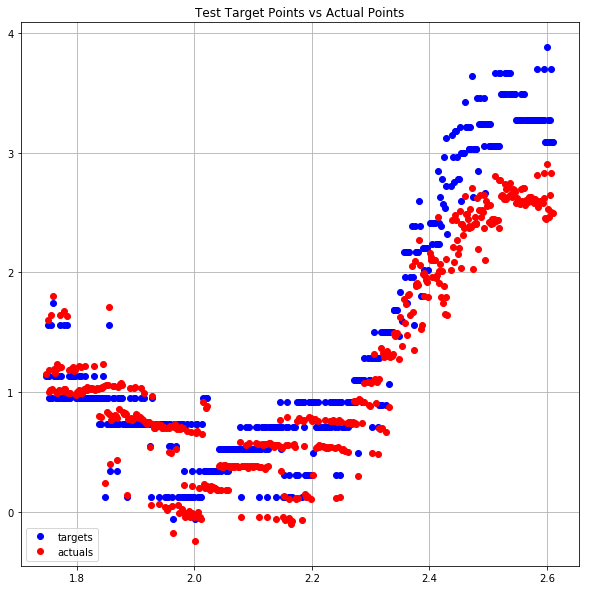

In [15]:
from pylab import plot, legend, subplot, grid, xlabel, ylabel, show, title
#subplot(3, 1, 2)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='lower left', numpoints=1)
title("Test Target Points vs Actual Points")
len(allactuals)

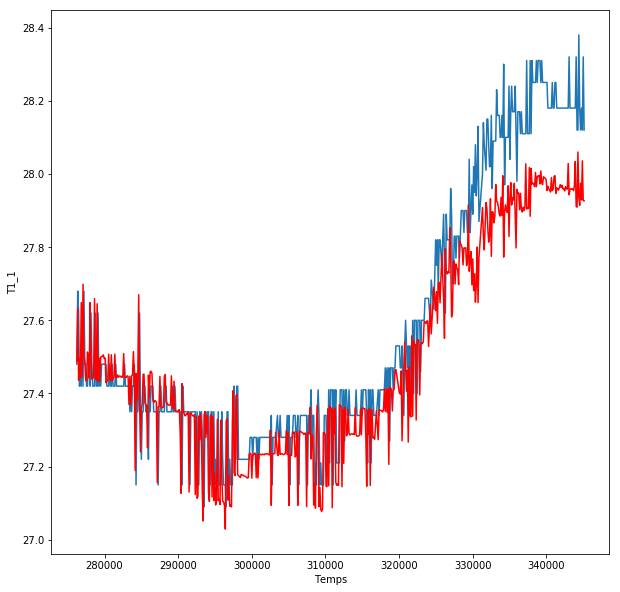

557

In [16]:
#df_ = pd.read_csv("household_power_consumption.txt", sep=";",  
 #               dtype={'Global_active_power ': float,'Global_reactive_power':float,'Voltage':float}).head(3500)
df_ = pd.read_excel("Forest_tempWithoutAnomalies.xlsx")
#our1_ = pd.read_excel("dataset.xlsx")
#our2_ = pd.read_excel("meteo.xlsx")
#df_ = pd.merge(our1, our2, on='Temps')
y_new_inverse = sc.inverse_transform(allactuals)
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.plot(df_.Temps[learn_end_point + 1:length - 1], df_.T1_1[learn_end_point + 1:length - 1])
plt.plot(df_.Temps[learn_end_point + 1:length - 1], y_new_inverse, color='red')
plt.xlabel('Temps')
plt.ylabel('T1_1')
#plt.plot(df_.Time[learn_end_point + 1:length - 1], df_.Global_reactive_power[learn_end_point + 1:length - 1])
#plt.plot(df_.Time[learn_end_point + 1:length - 1], y_new_inverse, color='red')
#plt.plot(df_graph.Time[learn_end_point + 1:learn_end_point+3], df_graph.Internaltemp[learn_end_point + 1:learn_end_point+3])
#plt.plot(df_graph.Time[learn_end_point + 1:learn_end_point+3], y_new_inverse[0:2], color='red')
plt.show()
#len(y_new_inverse)
len(df_.Temps[learn_end_point + 1:length - 1])